In [80]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [81]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'

# 分類数設定

In [82]:
NUM_CLASSES = 5

# 学習データ読み込み

In [83]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [84]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [87]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# モデルチェックポイントのコールバック
import keras
print(keras.version)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

<function version at 0x0000023F4687BD80>


In [89]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [90]:
print("Unique labels in dataset:", sorted(set(y_train)))

Unique labels in dataset: [0, 1, 2, 3]


In [91]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/29 ━━━━━━━━━━━━━━━━━━━━ 26s 929ms/step - accuracy: 0.2188 - loss: 1.6188
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3060 - loss: 1.5503 - val_accuracy: 0.4481 - val_loss: 1.4256
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3438 - loss: 1.4816
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4085 - loss: 1.4064 - val_accuracy: 0.4572 - val_loss: 1.2939
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3828 - loss: 1.3855
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4280 - loss: 1.3075 - val_accuracy: 0.5297 - val_loss: 1.1793
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4219 - loss: 1.2719
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4580 - loss: 1.2319 - val_accuracy: 0.5848 - val_loss: 1.0902
Epoch 5/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5469 - loss: 1.1237
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4816 - loss: 1.1623 - val_accuracy: 0.5972 - val_loss: 1.0100
Epoch 6/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4688 - loss: 1.1510
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5102 - loss: 1.1082 - val_accuracy: 0.6722 - val_loss: 0.9469
Epoch 7/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5547 - loss: 1.0600
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5385 - loss: 1.0601 - val_accuracy: 0.6886 - val_loss: 0.8869
Epoch 8/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5312 - loss: 1.0596
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5569 - loss: 1.0179 - val_accuracy: 0.7875 - val_loss: 0.8343
Epoch 9/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5781 - loss: 0.9394
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5679 - loss: 0.9882 - val_accuracy: 0.8114 - val_loss: 0.7916
Epoch 10/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5469 - loss: 1.0342
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5838 - loss: 0.9651 - val_accuracy: 0.8163 - val_loss: 0.7545
Epoch 11/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6406 - loss: 0.9685
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5912 - loss: 0.9430 - val_accuracy: 0.8229 - val_loss: 0.7213
Epoch 12/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5938 - loss: 0.9199
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5992 - loss: 0.9291 - val_accuracy: 0.8287 - val_loss: 0.6940
Epoch 13/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6641 - loss: 0.8368
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6184 - loss: 0.8887 - val_accuracy: 0.8460 - val_loss: 0.6650
Epoch 14/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6172 - loss: 0.8733
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: 0.8899 - val_accuracy: 0.8509 - val_loss: 0.6461
Epoch 15/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 0.8769
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 0.8615 - val_accuracy: 0.8493 - val_loss: 0.6254
Epoch 16/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5781 - loss: 0.8999
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6357 - loss: 0.8535 - val_accuracy: 0.8657 - val_loss: 0.6070
Epoch 17/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6797 - loss: 0.8403
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6404 - loss: 0.8346 - val_accuracy: 0.8641 - val_loss: 0.5850
Epoch 18/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6328 - loss: 0.8325
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6613 - loss: 0.8224 - val_accuracy: 0.8748 - val_loss: 0.5665
Epoch 19/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5625 - loss: 0.9091
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6473 - loss: 0.8177 - val_accuracy: 0.8855 - val_loss: 0.5548
Epoch 20/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7266 - loss: 0.7396
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6745 - loss: 0.7978 - val_accuracy: 0.8822 - val_loss: 0.5351
Epoch 21/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6172 - loss: 0.8163
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6709 - loss: 0.7868 - val_accuracy: 0.8913 - val_loss: 0.5218
Epoch 22/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7344 - loss: 0.6686
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - loss: 0.7763 - val_accuracy: 0.8987 - val_loss: 0.5026
Epoch 23/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6328 - loss: 0.7795
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6816 - loss: 0.7659 - val_accuracy: 0.9028 - val_loss: 0.4955
Epoch 24/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6484 - loss: 0.7620
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6964 - loss: 0.7397 - val_accuracy: 0.9036 - val_loss: 0.4760
Epoch 25/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7344 - loss: 0.6939
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6975 - loss: 0.7443 - val_accuracy: 0.9036 - val_loss: 0.4661
Epoch 26/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6797 - loss: 0.7923
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6843 - loss: 0.7581 - val_accuracy: 0.8979 - val_loss: 0.4551
Epoch 27/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6641 - loss: 0.7547
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6929 - loss: 0.7382 - val_accuracy: 0.9036 - val_loss: 0.4461
Epoch 28/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6953 - loss: 0.7450
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7019 - loss: 0.7236 - val_accuracy: 0.9036 - val_loss: 0.4336
Epoch 29/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6953 - loss: 0.7180
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7011 - loss: 0.7191 - val_accuracy: 0.9036 - val_loss: 0.4249
Epoch 30/1000
14/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7199 - loss: 0.7163 
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7253 - loss: 0.7022 - val_accuracy: 0.9110 - val_loss: 0.4127
Epoch 31/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.6428
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7214 - loss: 0.6971 - val_accuracy: 0.9135 - val_loss: 0.4056
Epoch 32/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6719 - loss: 0.7183
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7176 - loss: 0.7001 - val_accuracy: 0.9152 - val_loss: 0.3972
Epoch 33/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7812 - loss: 0.6090
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7258 - loss: 0.6823 - val_accuracy: 0.9185 - val_loss: 0.3923
Epoch 34/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7344 - loss: 0.6615
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7363 - loss: 0.6810 - val_accuracy: 0.9168 - val_loss: 0.3836
Epoch 35/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7344 - loss: 0.6992
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7212 - loss: 0.6824 - val_accuracy: 0.9217 - val_loss: 0.3727
Epoch 36/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 0.7896
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7357 - loss: 0.6682 - val_accuracy: 0.9275 - val_loss: 0.3710
Epoch 37/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.6524  
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7467 - loss: 0.6576 - val_accuracy: 0.9234 - val_loss: 0.3651
Epoch 38/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7422 - loss: 0.6764
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7514 - loss: 0.6541 - val_accuracy: 0.9250 - val_loss: 0.3572
Epoch 39/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7891 - loss: 0.5607
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7398 - loss: 0.6669 - val_accuracy: 0.9325 - val_loss: 0.3569
Epoch 40/1000
15/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7353 - loss: 0.6695 
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7538 - loss: 0.6380 - val_accuracy: 0.9292 - val_loss: 0.3551
Epoch 41/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8047 - loss: 0.5750
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7563 - loss: 0.6297 - val_accuracy: 0.9259 - val_loss: 0.3466
Epoch 42/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7578 - loss: 0.5970
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.6585 - val_accuracy: 0.9325 - val_loss: 0.3455
Epoch 43/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7344 - loss: 0.6881
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7464 - loss: 0.6387 - val_accuracy: 0.9292 - val_loss: 0.3435
Epoch 44/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.6115 
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7522 - loss: 0.6438 - val_accuracy: 0.9325 - val_loss: 0.3375
Epoch 45/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.6089 
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7618 - loss: 0.6183 - val_accuracy: 0.9316 - val_loss: 0.3384
Epoch 46/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.6243 
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7574 - loss: 0.6259 - val_accuracy: 0.9316 - val_loss: 0.3286
Epoch 47/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6719 - loss: 0.7640
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.6200 - val_accuracy: 0.9325 - val_loss: 0.3273
Epoch 48/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7578 - loss: 0.5749
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7695 - loss: 0.6054 - val_accuracy: 0.9357 - val_loss: 0.3235
Epoch 49/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8125 - loss: 0.5494
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7739 - loss: 0.6076 - val_accuracy: 0.9316 - val_loss: 0.3170
Epoch 50/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7344 - loss: 0.6670
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7662 - loss: 0.6101 - val_accuracy: 0.9341 - val_loss: 0.3119
Epoch 51/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7109 - loss: 0.6959
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7624 - loss: 0.6249 - val_accuracy: 0.9349 - val_loss: 0.3121
Epoch 52/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.6196
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7635 - loss: 0.6043 - val_accuracy: 0.9374 - val_loss: 0.3105
Epoch 53/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7578 - loss: 0.6838
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7753 - loss: 0.5968 - val_accuracy: 0.9349 - val_loss: 0.3084
Epoch 54/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7656 - loss: 0.5818
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.6026 - val_accuracy: 0.9390 - val_loss: 0.3050
Epoch 55/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7812 - loss: 0.5976
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.6073 - val_accuracy: 0.9366 - val_loss: 0.3069
Epoch 56/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7812 - loss: 0.5217
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7758 - loss: 0.5892 - val_accuracy: 0.9349 - val_loss: 0.3032
Epoch 57/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7734 - loss: 0.5429
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7758 - loss: 0.5843 - val_accuracy: 0.9390 - val_loss: 0.2973
Epoch 58/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7109 - loss: 0.7485
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7893 - loss: 0.5702 - val_accuracy: 0.9366 - val_loss: 0.2925
Epoch 59/1000
18/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7643 - loss: 0.5975 
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7777 - loss: 0.5785 - val_accuracy: 0.9390 - val_loss: 0.2870
Epoch 60/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.5768 
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7635 - loss: 0.5884 - val_accuracy: 0.9407 - val_loss: 0.2939
Epoch 61/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.6093 
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.5973 - val_accuracy: 0.9382 - val_loss: 0.2943
Epoch 62/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.6109 
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7810 - loss: 0.5890 - val_accuracy: 0.9399 - val_loss: 0.2884
Epoch 63/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.5855 
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7794 - loss: 0.5781 - val_accuracy: 0.9366 - val_loss: 0.2867
Epoch 64/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7771 - loss: 0.5921 
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7786 - loss: 0.5862 - val_accuracy: 0.9374 - val_loss: 0.2879
Epoch 65/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - loss: 0.5908 
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7755 - loss: 0.5923 - val_accuracy: 0.9390 - val_loss: 0.2936
Epoch 66/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7891 - loss: 0.6046
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.5594 - val_accuracy: 0.9415 - val_loss: 0.2831
Epoch 67/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.5745 
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7907 - loss: 0.5693 - val_accuracy: 0.9440 - val_loss: 0.2785
Epoch 68/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.5649 
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7887 - loss: 0.5571 - val_accuracy: 0.9415 - val_loss: 0.2825
Epoch 69/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7862 - loss: 0.5652
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7863 - loss: 0.5585 - val_accuracy: 0.9440 - val_loss: 0.2746
Epoch 70/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.5800 
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7934 - loss: 0.5605 - val_accuracy: 0.9448 - val_loss: 0.2725
Epoch 71/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.5823 
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7890 - loss: 0.5620 - val_accuracy: 0.9399 - val_loss: 0.2776
Epoch 72/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8047 - loss: 0.5350
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7959 - loss: 0.5526 - val_accuracy: 0.9432 - val_loss: 0.2702
Epoch 73/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.5589 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7857 - loss: 0.5640 - val_accuracy: 0.9423 - val_loss: 0.2750
Epoch 74/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.5610 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7926 - loss: 0.5599 - val_accuracy: 0.9407 - val_loss: 0.2699
Epoch 75/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.5460 
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7896 - loss: 0.5492 - val_accuracy: 0.9415 - val_loss: 0.2709
Epoch 76/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.5565 
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7863 - loss: 0.5558 - val_accuracy: 0.9432 - val_loss: 0.2680
Epoch 77/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.5799 
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.5571 - val_accuracy: 0.9432 - val_loss: 0.2672
Epoch 78/1000
20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.5361 
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7909 - loss: 0.5430 - val_accuracy: 0.9481 - val_loss: 0.2620
Epoch 79/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7891 - loss: 0.4986
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7975 - loss: 0.5376 - val_accuracy: 0.9456 - val_loss: 0.2632
Epoch 80/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.5415 
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7973 - loss: 0.5575 - val_accuracy: 0.9473 - val_loss: 0.2586
Epoch 81/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.5763 
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.5663 - val_accuracy: 0.9448 - val_loss: 0.2651
Epoch 82/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.5481 
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7951 - loss: 0.5423 - val_accuracy: 0.9423 - val_loss: 0.2649
Epoch 83/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.5265 
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8107 - loss: 0.5246 - val_accuracy: 0.9440 - val_loss: 0.2576
Epoch 84/1000
19/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.5555 
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7992 - loss: 0.5467 - val_accuracy: 0.9473 - val_loss: 0.2605
Epoch 85/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.5469 
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7975 - loss: 0.5482 - val_accuracy: 0.9465 - val_loss: 0.2594
Epoch 86/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.5166 
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7926 - loss: 0.5402 - val_accuracy: 0.9473 - val_loss: 0.2600
Epoch 87/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.5360 
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7934 - loss: 0.5429 - val_accuracy: 0.9448 - val_loss: 0.2608
Epoch 88/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7989 - loss: 0.5327
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7953 - loss: 0.5323 - val_accuracy: 0.9473 - val_loss: 0.2528
Epoch 89/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.5671 
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7920 - loss: 0.5518 - val_accuracy: 0.9489 - val_loss: 0.2550
Epoch 90/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.5265 
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8014 - loss: 0.5260 - val_accuracy: 0.9456 - val_loss: 0.2533
Epoch 91/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8594 - loss: 0.4198
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7929 - loss: 0.5346 - val_accuracy: 0.9489 - val_loss: 0.2463
Epoch 92/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.5514 
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7940 - loss: 0.5517 - val_accuracy: 0.9473 - val_loss: 0.2517
Epoch 93/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.5344 
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7970 - loss: 0.5308 - val_accuracy: 0.9489 - val_loss: 0.2479
Epoch 94/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.5569 
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7989 - loss: 0.5414 - val_accuracy: 0.9432 - val_loss: 0.2521
Epoch 95/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.5347 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8082 - loss: 0.5282 - val_accuracy: 0.9465 - val_loss: 0.2489
Epoch 96/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.5230 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8041 - loss: 0.5225 - val_accuracy: 0.9489 - val_loss: 0.2473
Epoch 97/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.5051 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8055 - loss: 0.5062 - val_accuracy: 0.9473 - val_loss: 0.2425
Epoch 98/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.5624 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7940 - loss: 0.5468 - val_accuracy: 0.9465 - val_loss: 0.2452
Epoch 99/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.5119 
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.5105 - val_accuracy: 0.9456 - val_loss: 0.2405
Epoch 100/1000
20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.5564 
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7926 - loss: 0.5404 - val_accuracy: 0.9489 - val_loss: 0.2425
Epoch 101/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.5261 
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8025 - loss: 0.5308 - val_accuracy: 0.9506 - val_loss: 0.2414
Epoch 102/1000
20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7995 - loss: 0.5534
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8041 - loss: 0.5436 - val_accuracy: 0.9498 - val_loss: 0.2429
Epoch 103/1000
20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.5493 
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7959 - loss: 0.5312 - val_accuracy: 0.9506 - val_loss: 0.2429
Epoch 104/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.5019 
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8107 - loss: 0.5139 - val_accuracy: 0.9514 - val_loss: 0.2421
Epoch 105/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.5140 
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8066 - loss: 0.5325 - val_accuracy: 0.9481 - val_loss: 0.2439
Epoch 106/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.5369 
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8165 - loss: 0.5136 - val_accuracy: 0.9522 - val_loss: 0.2404
Epoch 107/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.5391 
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7964 - loss: 0.5390 - val_accuracy: 0.9498 - val_loss: 0.2435
Epoch 108/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.5214 
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8022 - loss: 0.5300 - val_accuracy: 0.9514 - val_loss: 0.2424
Epoch 109/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.5478 
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8074 - loss: 0.5257 - val_accuracy: 0.9489 - val_loss: 0.2418
Epoch 110/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.5360 
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8110 - loss: 0.5191 - val_accuracy: 0.9514 - val_loss: 0.2372
Epoch 111/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.5424 
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8096 - loss: 0.5180 - val_accuracy: 0.9432 - val_loss: 0.2420
Epoch 112/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.5347 
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8011 - loss: 0.5237 - val_accuracy: 0.9539 - val_loss: 0.2369
Epoch 113/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8326 - loss: 0.5037 
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8214 - loss: 0.5059 - val_accuracy: 0.9530 - val_loss: 0.2374
Epoch 114/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.5284 
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8129 - loss: 0.5124 - val_accuracy: 0.9498 - val_loss: 0.2334
Epoch 115/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4832 
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8228 - loss: 0.4895 - val_accuracy: 0.9489 - val_loss: 0.2310
Epoch 116/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.5484 
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8102 - loss: 0.5285 - val_accuracy: 0.9489 - val_loss: 0.2362
Epoch 117/1000
20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8221 - loss: 0.5011 
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8146 - loss: 0.5177 - val_accuracy: 0.9530 - val_loss: 0.2313
Epoch 118/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.5171 
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8014 - loss: 0.5284 - val_accuracy: 0.9530 - val_loss: 0.2360
Epoch 119/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.5001 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8137 - loss: 0.5077 - val_accuracy: 0.9539 - val_loss: 0.2329
Epoch 120/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4777 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8132 - loss: 0.4958 - val_accuracy: 0.9498 - val_loss: 0.2337
Epoch 121/1000
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.5076 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8126 - loss: 0.5067 - val_accuracy: 0.9539 - val_loss: 0.2309
Epoch 122/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.5031 
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8173 - loss: 0.4994 - val_accuracy: 0.9555 - val_loss: 0.2304
Epoch 123/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.4855 
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8107 - loss: 0.5050 - val_accuracy: 0.9555 - val_loss: 0.2300
Epoch 124/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4891 
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8192 - loss: 0.5033 - val_accuracy: 0.9530 - val_loss: 0.2276
Epoch 125/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8114 - loss: 0.5123 
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8168 - loss: 0.4920 - val_accuracy: 0.9555 - val_loss: 0.2265
Epoch 126/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.4963 
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8137 - loss: 0.5054 - val_accuracy: 0.9514 - val_loss: 0.2283
Epoch 127/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.4990 
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8170 - loss: 0.5066 - val_accuracy: 0.9514 - val_loss: 0.2311
Epoch 128/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8191 - loss: 0.4764 
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8198 - loss: 0.4867 - val_accuracy: 0.9506 - val_loss: 0.2242
Epoch 129/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.5304 
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8195 - loss: 0.5084 - val_accuracy: 0.9572 - val_loss: 0.2251
Epoch 130/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - loss: 0.4903 
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8126 - loss: 0.5081 - val_accuracy: 0.9572 - val_loss: 0.2265
Epoch 131/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.5293  
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8069 - loss: 0.5105 - val_accuracy: 0.9473 - val_loss: 0.2310
Epoch 132/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.5106 
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8140 - loss: 0.5119 - val_accuracy: 0.9530 - val_loss: 0.2281
Epoch 133/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.5026 
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8192 - loss: 0.4952 - val_accuracy: 0.9563 - val_loss: 0.2193
Epoch 134/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8114 - loss: 0.5018 
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 0.5154 - val_accuracy: 0.9522 - val_loss: 0.2224
Epoch 135/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8114 - loss: 0.5173 
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8242 - loss: 0.4882 - val_accuracy: 0.9522 - val_loss: 0.2211
Epoch 136/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4603 
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8217 - loss: 0.4757 - val_accuracy: 0.9473 - val_loss: 0.2252
Epoch 137/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4891 
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8132 - loss: 0.5005 - val_accuracy: 0.9555 - val_loss: 0.2262
Epoch 138/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4953 
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8245 - loss: 0.4942 - val_accuracy: 0.9547 - val_loss: 0.2242
Epoch 139/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4833 
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8157 - loss: 0.4985 - val_accuracy: 0.9514 - val_loss: 0.2269
Epoch 140/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.5086 
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8242 - loss: 0.4958 - val_accuracy: 0.9498 - val_loss: 0.2245
Epoch 141/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.5343 
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8069 - loss: 0.5135 - val_accuracy: 0.9580 - val_loss: 0.2250
Epoch 142/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4889 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8201 - loss: 0.4954 - val_accuracy: 0.9555 - val_loss: 0.2258
Epoch 143/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.5171 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8132 - loss: 0.5028 - val_accuracy: 0.9506 - val_loss: 0.2272
Epoch 144/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.5053 
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8124 - loss: 0.5121 - val_accuracy: 0.9514 - val_loss: 0.2304
Epoch 145/1000
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8290 - loss: 0.4943 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8288 - loss: 0.4790 - val_accuracy: 0.9522 - val_loss: 0.2240
Epoch 146/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.5021 
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8223 - loss: 0.4869 - val_accuracy: 0.9580 - val_loss: 0.2212
Epoch 147/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8126 - loss: 0.4960 
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8242 - loss: 0.4829 - val_accuracy: 0.9522 - val_loss: 0.2216
Epoch 148/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4966 
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8159 - loss: 0.4812 - val_accuracy: 0.9514 - val_loss: 0.2253
Epoch 149/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4835 
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8165 - loss: 0.4909 - val_accuracy: 0.9539 - val_loss: 0.2203
Epoch 150/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4864 
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8253 - loss: 0.4834 - val_accuracy: 0.9563 - val_loss: 0.2179
Epoch 151/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.4924 
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8286 - loss: 0.4861 - val_accuracy: 0.9481 - val_loss: 0.2185
Epoch 152/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.5191 
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8140 - loss: 0.5083 - val_accuracy: 0.9498 - val_loss: 0.2272
Epoch 153/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4629 
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8269 - loss: 0.4701 - val_accuracy: 0.9555 - val_loss: 0.2168
Epoch 154/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4872 
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8192 - loss: 0.4915 - val_accuracy: 0.9456 - val_loss: 0.2225
Epoch 155/1000
18/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.4861 
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8294 - loss: 0.4820 - val_accuracy: 0.9522 - val_loss: 0.2259
Epoch 156/1000
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.5195 
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8206 - loss: 0.4926 - val_accuracy: 0.9547 - val_loss: 0.2241
Epoch 157/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.4983 
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8168 - loss: 0.4927 - val_accuracy: 0.9596 - val_loss: 0.2201
Epoch 158/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.4942 
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8253 - loss: 0.4929 - val_accuracy: 0.9572 - val_loss: 0.2170
Epoch 159/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4954 
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8228 - loss: 0.4988 - val_accuracy: 0.9530 - val_loss: 0.2204
Epoch 160/1000
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.5063 
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8140 - loss: 0.5051 - val_accuracy: 0.9563 - val_loss: 0.2129
Epoch 161/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.4799 
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8187 - loss: 0.4946 - val_accuracy: 0.9572 - val_loss: 0.2156
Epoch 162/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8150 - loss: 0.4904 
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8159 - loss: 0.5020 - val_accuracy: 0.9613 - val_loss: 0.2147
Epoch 163/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.4929 
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8239 - loss: 0.4792 - val_accuracy: 0.9555 - val_loss: 0.2141
Epoch 164/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.4776 
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8209 - loss: 0.4880 - val_accuracy: 0.9605 - val_loss: 0.2080
Epoch 165/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8160 - loss: 0.4877 
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8184 - loss: 0.4898 - val_accuracy: 0.9514 - val_loss: 0.2208
Epoch 166/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.4644 
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8264 - loss: 0.4732 - val_accuracy: 0.9605 - val_loss: 0.2162
Epoch 167/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.5081 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8288 - loss: 0.4745 - val_accuracy: 0.9613 - val_loss: 0.2111
Epoch 168/1000
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.4753 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8327 - loss: 0.4752 - val_accuracy: 0.9596 - val_loss: 0.2078
Epoch 169/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4524 
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8313 - loss: 0.4678 - val_accuracy: 0.9563 - val_loss: 0.2129
Epoch 170/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4761 
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8220 - loss: 0.4843 - val_accuracy: 0.9547 - val_loss: 0.2129
Epoch 171/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4647 
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8302 - loss: 0.4746 - val_accuracy: 0.9514 - val_loss: 0.2172
Epoch 172/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.4750 
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8283 - loss: 0.4714 - val_accuracy: 0.9572 - val_loss: 0.2115
Epoch 173/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.4491 
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8354 - loss: 0.4726 - val_accuracy: 0.9489 - val_loss: 0.2146
Epoch 174/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8161 - loss: 0.5112 
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8157 - loss: 0.4971 - val_accuracy: 0.9613 - val_loss: 0.2130
Epoch 175/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.4964 
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8181 - loss: 0.4825 - val_accuracy: 0.9563 - val_loss: 0.2135
Epoch 176/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.4808 
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8299 - loss: 0.4700 - val_accuracy: 0.9629 - val_loss: 0.2076
Epoch 177/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8279 - loss: 0.4779 
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8266 - loss: 0.4713 - val_accuracy: 0.9572 - val_loss: 0.2096
Epoch 178/1000
20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8295 - loss: 0.4688 
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8316 - loss: 0.4695 - val_accuracy: 0.9588 - val_loss: 0.2039
Epoch 179/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4815 
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8137 - loss: 0.4898 - val_accuracy: 0.9613 - val_loss: 0.2073
Epoch 180/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.4647 
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8223 - loss: 0.4689 - val_accuracy: 0.9572 - val_loss: 0.2086
Epoch 181/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4872 
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8176 - loss: 0.4841 - val_accuracy: 0.9563 - val_loss: 0.2112
Epoch 182/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4704 
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8250 - loss: 0.4900 - val_accuracy: 0.9572 - val_loss: 0.2104
Epoch 183/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.4779 
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8275 - loss: 0.4810 - val_accuracy: 0.9572 - val_loss: 0.2135
Epoch 184/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.4705 
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8203 - loss: 0.4946 - val_accuracy: 0.9530 - val_loss: 0.2206
Epoch 185/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4744 
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8234 - loss: 0.4879 - val_accuracy: 0.9596 - val_loss: 0.2191
Epoch 186/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4907 
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8269 - loss: 0.4764 - val_accuracy: 0.9596 - val_loss: 0.2180
Epoch 187/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 0.4664 
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8201 - loss: 0.4785 - val_accuracy: 0.9588 - val_loss: 0.2137
Epoch 188/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8279 - loss: 0.4989 
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8181 - loss: 0.4893 - val_accuracy: 0.9638 - val_loss: 0.2106
Epoch 189/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.4642 
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8327 - loss: 0.4691 - val_accuracy: 0.9588 - val_loss: 0.2052
Epoch 190/1000
14/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.4559 
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8294 - loss: 0.4757 - val_accuracy: 0.9605 - val_loss: 0.2119
Epoch 191/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8405 - loss: 0.4365 
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8288 - loss: 0.4604 - val_accuracy: 0.9539 - val_loss: 0.2155
Epoch 192/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4905 
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8324 - loss: 0.4760 - val_accuracy: 0.9596 - val_loss: 0.2092
Epoch 193/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.4419 
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8385 - loss: 0.4481 - val_accuracy: 0.9605 - val_loss: 0.2014
Epoch 194/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.4336 
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8371 - loss: 0.4693 - val_accuracy: 0.9596 - val_loss: 0.2037
Epoch 195/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.5014 
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8209 - loss: 0.4838 - val_accuracy: 0.9605 - val_loss: 0.2103
Epoch 196/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.4794 
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8195 - loss: 0.4884 - val_accuracy: 0.9605 - val_loss: 0.2148
Epoch 197/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.4999 
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8225 - loss: 0.4873 - val_accuracy: 0.9580 - val_loss: 0.2094
Epoch 198/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4928 
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8357 - loss: 0.4615 - val_accuracy: 0.9580 - val_loss: 0.2079
Epoch 199/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.4591  
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8231 - loss: 0.4759 - val_accuracy: 0.9621 - val_loss: 0.2042
Epoch 200/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4867 
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8321 - loss: 0.4677 - val_accuracy: 0.9605 - val_loss: 0.2034
Epoch 201/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - loss: 0.4664 
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8214 - loss: 0.4831 - val_accuracy: 0.9580 - val_loss: 0.2055
Epoch 202/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.4341 
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8283 - loss: 0.4701 - val_accuracy: 0.9522 - val_loss: 0.2121
Epoch 203/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.4724 
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8269 - loss: 0.4838 - val_accuracy: 0.9588 - val_loss: 0.2141
Epoch 204/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4776 
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8245 - loss: 0.4857 - val_accuracy: 0.9613 - val_loss: 0.2160
Epoch 205/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8270 - loss: 0.4667 
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8225 - loss: 0.4874 - val_accuracy: 0.9588 - val_loss: 0.2138
Epoch 206/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.4847 
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8363 - loss: 0.4579 - val_accuracy: 0.9563 - val_loss: 0.2114
Epoch 207/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 0.4958 
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8310 - loss: 0.4628 - val_accuracy: 0.9596 - val_loss: 0.2129
Epoch 208/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.4554 
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8341 - loss: 0.4552 - val_accuracy: 0.9580 - val_loss: 0.2078
Epoch 209/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.4832 
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8269 - loss: 0.4747 - val_accuracy: 0.9555 - val_loss: 0.2065
Epoch 210/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.4925 
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8277 - loss: 0.4748 - val_accuracy: 0.9588 - val_loss: 0.2108
Epoch 211/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4867 
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8324 - loss: 0.4694 - val_accuracy: 0.9522 - val_loss: 0.2099
Epoch 212/1000
17/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8292 - loss: 0.4659 
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8201 - loss: 0.4881 - val_accuracy: 0.9555 - val_loss: 0.2137
Epoch 213/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8257 - loss: 0.4825 
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8288 - loss: 0.4685 - val_accuracy: 0.9555 - val_loss: 0.2156
Epoch 213: early stopping


In [92]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9555 - loss: 0.2156 


In [93]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [94]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
[1.3547219e-02 5.8355246e-02 9.2205292e-01 6.0442025e-03 3.7748586e-07]
2


# 混同行列

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


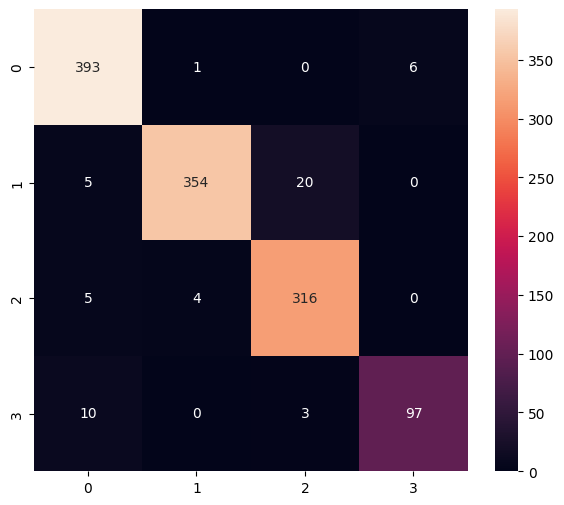

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       400
           1       0.99      0.93      0.96       379
           2       0.93      0.97      0.95       325
           3       0.94      0.88      0.91       110

    accuracy                           0.96      1214
   macro avg       0.95      0.94      0.95      1214
weighted avg       0.96      0.96      0.96      1214



In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [96]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [97]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\shell\AppData\Local\Temp\tmpg0cwze90\assets


INFO:tensorflow:Assets written to: C:\Users\shell\AppData\Local\Temp\tmpg0cwze90\assets


Saved artifact at 'C:\Users\shell\AppData\Local\Temp\tmpg0cwze90'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2471166911184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2471166908880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2471166913488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2471166910992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2471166910032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2471166909648: TensorSpec(shape=(), dtype=tf.resource, name=None)


6620

# 推論テスト

In [98]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\shell\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [99]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [100]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [101]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [102]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3547219e-02 5.8355246e-02 9.2205292e-01 6.0442025e-03 3.7748549e-07]
2
